In [80]:
import numpy as np
from numpy import sqrt, mean, absolute
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Dataset



##training

In [81]:
df = pd.read_excel('beras_train.xlsx', engine='openpyxl')
df

,Bln 1,Bln 2,Bln 3,Bln 4,Bln 5,Bln 6,Bln 7,Bln 8,Bln 9,Bln 10,Bln 11,Bln 12,Target
0,373,239,327,293,313,291,312,287,302,310,225,327,600
1,239,327,293,313,291,312,287,302,310,225,327,600,612
2,327,293,313,291,312,287,302,310,225,327,600,612,616
3,293,313,291,312,287,302,310,225,327,600,612,616,593
4,313,291,312,287,302,310,225,327,600,612,616,593,596
5,291,312,287,302,310,225,327,600,612,616,593,596,537
6,312,287,302,310,225,327,600,612,616,593,596,537,478
7,287,302,310,225,327,600,612,616,593,596,537,478,459
8,302,310,225,327,600,612,616,593,596,537,478,459,455
9,310,225,327,600,612,616,593,596,537,478,459,455,489


##testing

In [82]:
dft = pd.read_excel('beras_test.xlsx', engine='openpyxl')
dft

,Bln 1,Bln 2,Bln 3,Bln 4,Bln 5,Bln 6,Bln 7,Bln 8,Bln 9,Bln 10,Bln 11,Bln 12
0,612,616,593,596,537,478,459,455,489,570,607,607
1,616,593,596,537,478,459,455,489,570,607,607,610
2,593,596,537,478,459,455,489,570,607,607,610,615
3,596,537,478,459,455,489,570,607,607,610,615,599
4,537,478,459,455,489,570,607,607,610,615,599,601
5,478,459,455,489,570,607,607,610,615,599,601,612
6,459,455,489,570,607,607,610,615,599,601,612,597
7,455,489,570,607,607,610,615,599,601,612,597,610
8,489,570,607,607,610,615,599,601,612,597,610,602
9,570,607,607,610,615,599,601,612,597,610,602,629


# Normalisasi


##Training

In [83]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_norm = mmscaler.fit_transform(df)
pd.DataFrame(dataset_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.378517,0.035806,0.260870,0.173913,0.225064,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.000000,0.739796
1,0.035806,0.260870,0.173913,0.225064,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.252475,0.903974,0.801020
2,0.260870,0.173913,0.225064,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.260870,0.928218,0.943709,0.821429
3,0.173913,0.225064,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.260870,0.959079,0.957921,0.956954,0.704082
4,0.225064,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.260870,0.959079,0.989770,0.967822,0.880795,0.719388
5,0.168798,0.222506,0.158568,0.196931,0.217391,0.000000,0.260870,0.959079,0.989770,1.000000,0.910891,0.890728,0.418367
6,0.222506,0.158568,0.196931,0.217391,0.000000,0.260870,0.959079,0.989770,1.000000,0.941176,0.918317,0.695364,0.117347
7,0.158568,0.196931,0.217391,0.000000,0.260870,0.959079,0.989770,1.000000,0.941176,0.948849,0.772277,0.500000,0.020408
8,0.196931,0.217391,0.000000,0.260870,0.959079,0.989770,1.000000,0.941176,0.948849,0.797954,0.626238,0.437086,0.000000
9,0.217391,0.000000,0.260870,0.959079,0.989770,1.000000,0.941176,0.948849,0.797954,0.647059,0.579208,0.423841,0.173469


##Testing

In [84]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_tes_norm = mmscaler.fit_transform(dft)
pd.DataFrame(dataset_tes_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.975155,1.000000,0.86250,0.88125,0.51250,0.14375,0.02500,0.00000,0.000000,0.000000,0.31250,0.185185
1,1.000000,0.857143,0.88125,0.51250,0.14375,0.02500,0.00000,0.21250,0.642857,0.627119,0.31250,0.240741
2,0.857143,0.875776,0.51250,0.14375,0.02500,0.00000,0.21250,0.71875,0.936508,0.627119,0.40625,0.333333
3,0.875776,0.509317,0.14375,0.02500,0.00000,0.21250,0.71875,0.95000,0.936508,0.677966,0.56250,0.037037
4,0.509317,0.142857,0.02500,0.00000,0.21250,0.71875,0.95000,0.95000,0.960317,0.762712,0.06250,0.074074
5,0.142857,0.024845,0.00000,0.21250,0.71875,0.95000,0.95000,0.96875,1.000000,0.491525,0.12500,0.277778
6,0.024845,0.000000,0.21250,0.71875,0.95000,0.95000,0.96875,1.00000,0.873016,0.525424,0.46875,0.000000
7,0.000000,0.211180,0.71875,0.95000,0.95000,0.96875,1.00000,0.90000,0.888889,0.711864,0.00000,0.240741
8,0.211180,0.714286,0.95000,0.95000,0.96875,1.00000,0.90000,0.91250,0.976190,0.457627,0.40625,0.092593
9,0.714286,0.944099,0.95000,0.96875,1.00000,0.90000,0.91250,0.98125,0.857143,0.677966,0.15625,0.592593


# Pembagian data input dan target


##training

In [85]:
X = dataset_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y_norm = dataset_norm[:, [-1]]
y = y_norm.reshape(24)

##testing

In [86]:
x_tes = dataset_tes_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

# K-Fold Cross validation

In [87]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X,y):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] TEST: [ 3 13 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19 21 22 23] TEST: [14 17 20]
TRAIN: [ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 2  4 10]
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23] TEST: [ 6  7 19]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23] TEST: [ 1 21]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23] TEST: [ 0 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22] TEST: [15 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23] TEST: [ 9 22]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 8 12]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 5 11]


##Menampilkan hasil split data

In [88]:
for train_index, test_index in cv.split(X,y):
   print("------------------------------------------------------------------------")
   print("Index TRAIN:", train_index, "Index TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print("X_TRAIN: \n",X_train,"\n X_Test: \n",X_test,"\n Y_Train: \n", y_train,"\nY_Test: ", y_test)
   print("------------------------------------------------------------------------\n\n")

------------------------------------------------------------------------
Index TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] Index TEST: [ 3 13 18]
X_TRAIN: 
 [[0.37851662 0.03580563 0.26086957 0.17391304 0.22506394 0.16879795
  0.22250639 0.15856777 0.19693095 0.2173913  0.         0.        ]
 [0.03580563 0.26086957 0.17391304 0.22506394 0.16879795 0.22250639
  0.15856777 0.19693095 0.2173913  0.         0.25247525 0.90397351]
 [0.26086957 0.17391304 0.22506394 0.16879795 0.22250639 0.15856777
  0.19693095 0.2173913  0.         0.26086957 0.92821782 0.94370861]
 [0.22506394 0.16879795 0.22250639 0.15856777 0.19693095 0.2173913
  0.         0.26086957 0.95907928 0.98976982 0.96782178 0.8807947 ]
 [0.16879795 0.22250639 0.15856777 0.19693095 0.2173913  0.
  0.26086957 0.95907928 0.98976982 1.         0.91089109 0.89072848]
 [0.22250639 0.15856777 0.19693095 0.2173913  0.         0.26086957
  0.95907928 0.98976982 1.         0.94117647 0.91831683 0.69536424]
 [

## Pembangunan Model Regresi

In [89]:
## membangun model
model = KNeighborsRegressor(metric='euclidean')
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluasi

RMSE value for k=  1 is: 0.34453952312209013
RMSE value for k=  2 is: 0.31318801811991076
RMSE value for k=  3 is: 0.3297855415286737
RMSE value for k=  4 is: 0.3407549641285234
RMSE value for k=  5 is: 0.37375644148431797
RMSE value for k=  6 is: 0.39956396301996217
RMSE value for k=  7 is: 0.4064889127043978
RMSE value for k=  8 is: 0.4172232676901432
RMSE value for k=  9 is: 0.4126793341133438
RMSE value for k=  10 is: 0.41450117549869014
RMSE value for k=  11 is: 0.4189301537449404
RMSE value for k=  12 is: 0.41715957239830587
RMSE value for k=  13 is: 0.42533884666764576
RMSE value for k=  14 is: 0.4456830509725474


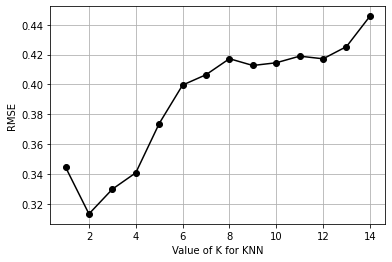

In [90]:
k_range = range(1, 15)
rmse_err = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')    
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    RMSE = sqrt(mean(absolute(scores)))
    rmse_err.append(RMSE) 
    print('RMSE value for k= ' , k , 'is:', RMSE)
plt.plot(k_range, rmse_err, '-ok')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#Performance Measure

In [91]:
#akurasi RMSE
model = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)    
sqrt(mean(absolute(scores)))

0.31318801811991076

# Model terbaik

In [92]:
model = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

# Prediksi Penjualan

In [77]:
y_pred = model.predict(x_tes)
y_pred
dft['prediksi'] = y_pred
dft

,Bln 1,Bln 2,Bln 3,Bln 4,Bln 5,Bln 6,Bln 7,Bln 8,Bln 9,Bln 10,Bln 11,Bln 12,prediksi
0,262,239,255,247,262,269,220,245,242,288,243,255,0.652015
1,239,255,247,262,269,220,245,242,288,243,255,267,0.646520
2,255,247,262,269,220,245,242,288,243,255,267,288,0.648352
3,247,262,269,220,245,242,288,243,255,267,288,279,0.556777
4,262,269,220,245,242,288,243,255,267,288,279,278,0.547619
5,269,220,245,242,288,243,255,267,288,279,278,265,0.723443
6,220,245,242,288,243,255,267,288,279,278,265,291,0.754579
7,245,242,288,243,255,267,288,279,278,265,291,291,0.793040
8,242,288,243,255,267,288,279,278,265,291,291,257,0.666667
9,288,243,255,267,288,279,278,265,291,291,257,256,0.670330


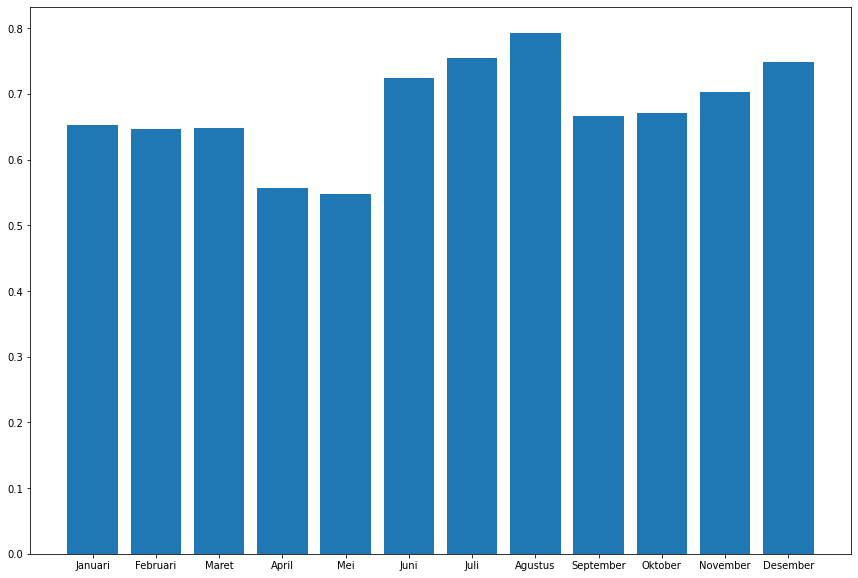

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.9,1.9])
Prediksi = np.array(dft['prediksi'])
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

ax.bar(Bulan,Prediksi)
plt.show()